In [1]:
import pandas as pd

df = pd.read_csv("athlete_events.csv")

print("Missing Values Before Dropping:\n", df.isnull().sum())

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

df['Year'] = df['Year'].astype(int)

df['Sex'] = df['Sex'].str.strip().str.upper()
df['Sport'] = df['Sport'].str.strip()
df['Medal'] = df['Medal'].str.strip()

print("Missing Values After Dropping:\n", df.isnull().sum())

df.to_csv("cleaned_athlete_events.csv", index=False)

df.info()
df.head()

Missing Values Before Dropping:
 ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64
Missing Values After Dropping:
 ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


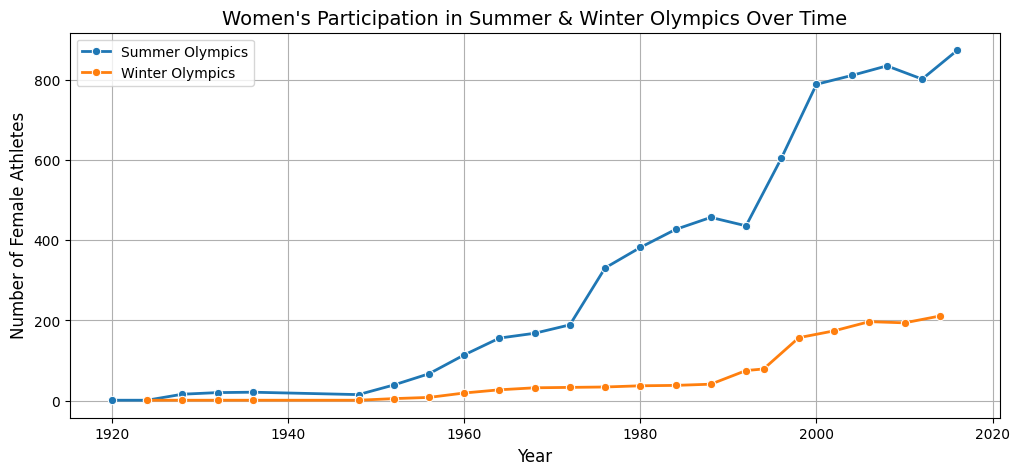

C:\Users\mshis\AppData\Local\Temp\ipykernel_20520\1688530890.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette="coolwarm")


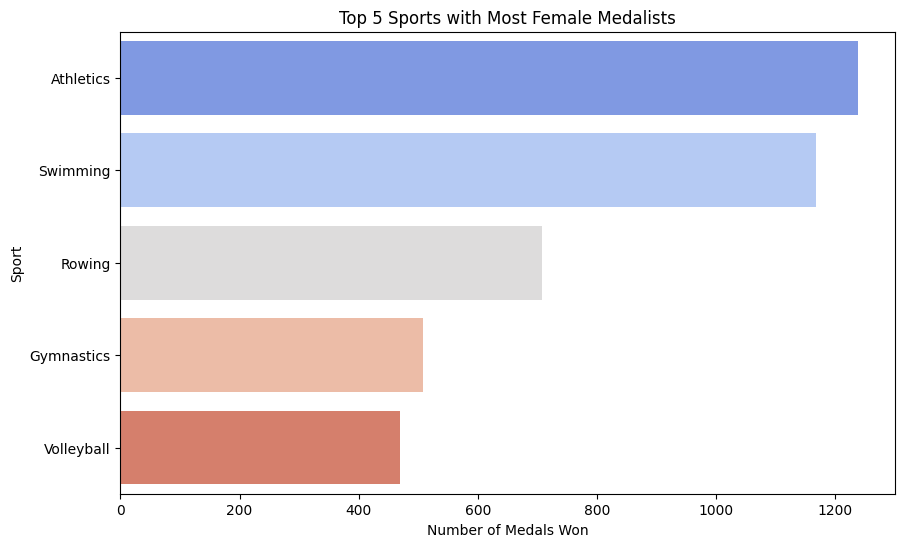

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_athlete_events.csv")

df_women = df[df["Sex"] == "F"]

df_summer = df_women[df_women["Season"] == "Summer"]
df_winter = df_women[df_women["Season"] == "Winter"]

summer_counts = df_summer.groupby("Year")["ID"].nunique()
winter_counts = df_winter.groupby("Year")["ID"].nunique()

plt.figure(figsize=(12, 5))
sns.lineplot(x=summer_counts.index, y=summer_counts.values, marker="o", linewidth=2, label="Summer Olympics")
sns.lineplot(x=winter_counts.index, y=winter_counts.values, marker="o", linewidth=2, label="Winter Olympics")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Female Athletes", fontsize=12)
plt.title("Women's Participation in Summer & Winter Olympics Over Time", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("participation_trends.png", dpi=300, bbox_inches="tight")
plt.show()

female_medalists = df[(df['Sex'] == 'F') & (df['Medal'].notna())]

top_sports = female_medalists['Sport'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sports.values, y=top_sports.index, palette="coolwarm")
plt.xlabel("Number of Medals Won")
plt.ylabel("Sport")
plt.title("Top 5 Sports with Most Female Medalists")
plt.savefig("top_sports_medals.png")
plt.show()



In [3]:
import pandas as pd

df = pd.read_csv("cleaned_athlete_events.csv")

print(df["Medal"].unique())

df_women = df[df["Sex"] == "F"]

print(df_women["Age"].describe())

print(df_women[["Age", "Medal"]].isna().sum())

print(df_women[df_women["Medal"].notna()].head(10))


['Bronze' 'Gold' 'Silver']
count    10350.000000
mean        24.597585
std          5.097057
min         13.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         52.000000
Name: Age, dtype: float64
Age      0
Medal    0
dtype: int64
     ID                                     Name Sex   Age  Height  Weight  \
15   37                       Ann Kristin Aarnes   F  23.0   182.0    64.0   
18   65                        Patimat Abakarova   F  21.0   165.0    49.0   
19   67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0   179.0    80.0   
29   90                Tamila Rashidovna Abasova   F  21.0   163.0    60.0   
43  153                    Monica Cecilia Abbott   F  23.0   191.0    88.0   
44  165                      Nia Nicole Abdallah   F  20.0   175.0    56.0   
46  259                               Reema Abdo   F  21.0   173.0    59.0   
59  394                               Irene Abel   F  19.0   160.0    48.0   
60  395                           

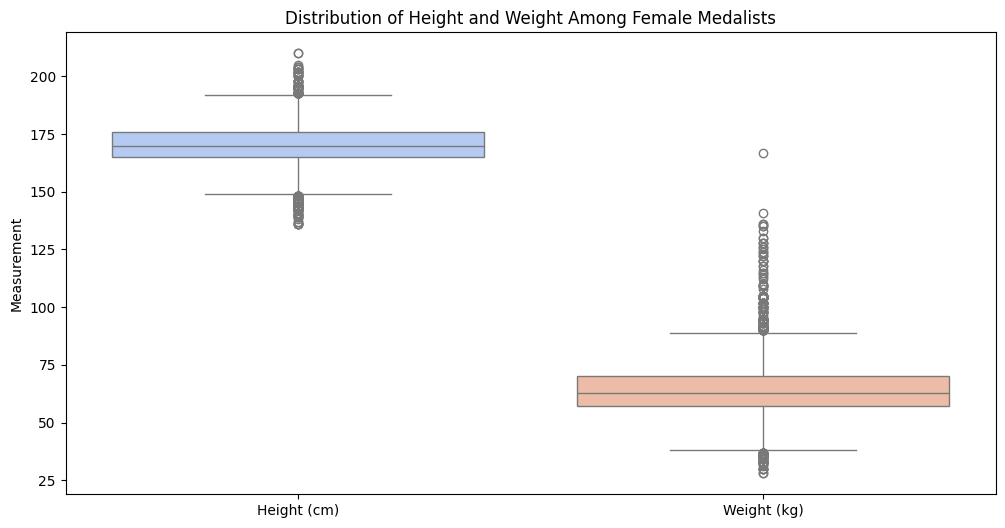

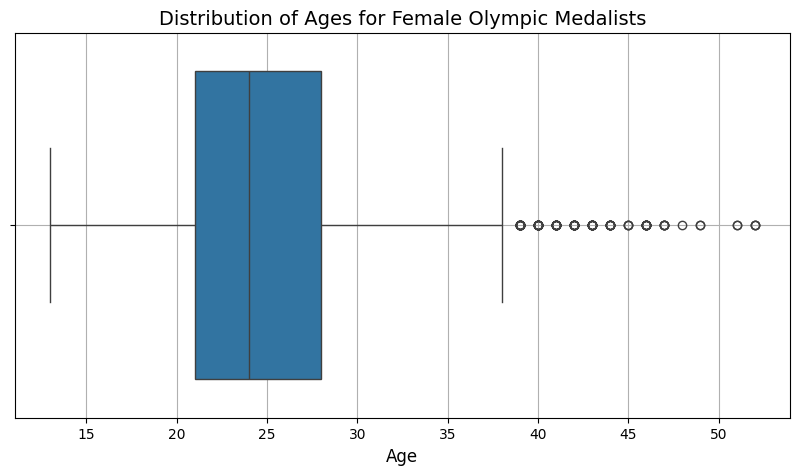

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_athlete_events.csv")

df_women = df[df["Sex"] == "F"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=female_medalists[['Height', 'Weight']], palette="coolwarm")
plt.title("Distribution of Height and Weight Among Female Medalists")
plt.ylabel("Measurement")
plt.xticks(ticks=[0, 1], labels=["Height (cm)", "Weight (kg)"])
plt.savefig("height_weight_distribution.png")
plt.show()
df_medalists = df_women[df_women["Medal"].notna()]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_medalists["Age"])
plt.xlabel("Age", fontsize=12)
plt.title("Distribution of Ages for Female Olympic Medalists", fontsize=14)
plt.grid(True)
plt.savefig("age_distribution.png")
plt.show()


C:\Users\mshis\AppData\Local\Temp\ipykernel_20520\711816894.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


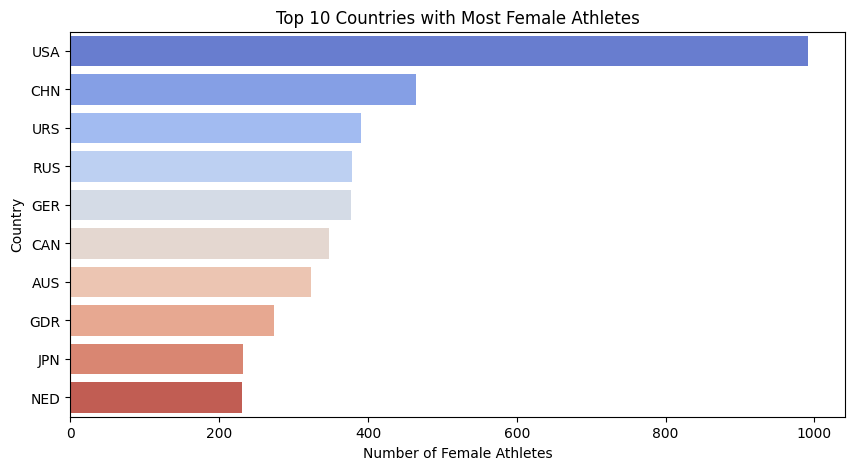

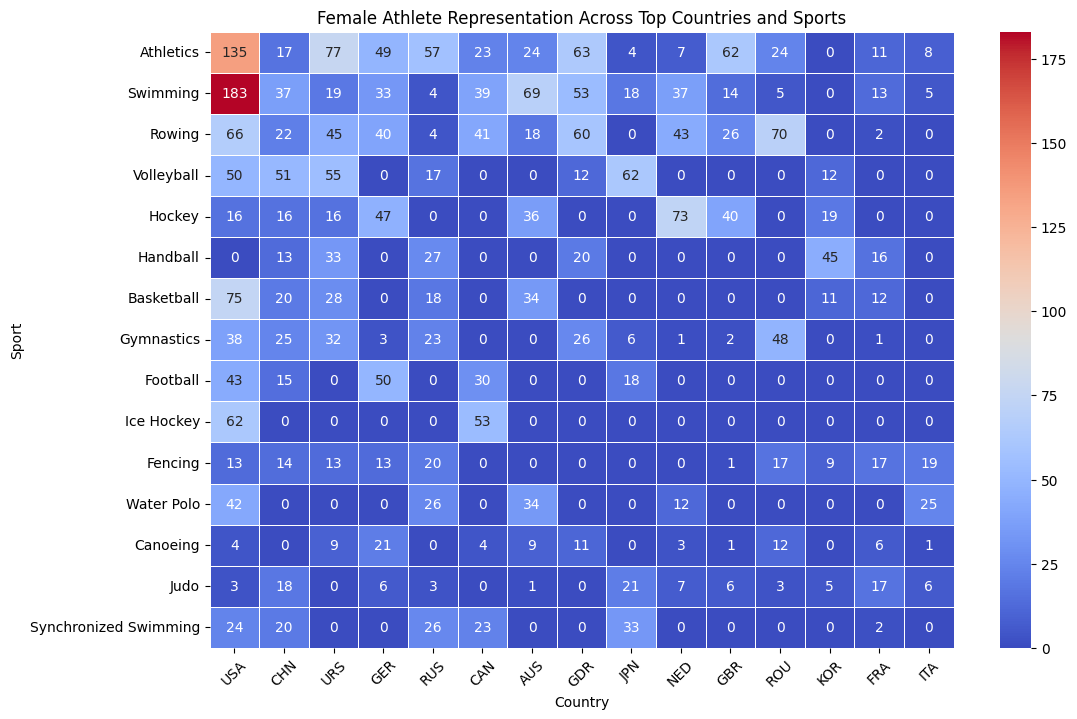

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

female_athletes_by_country = df[df["Sex"] == "F"].groupby("NOC")["ID"].nunique()

top_countries = female_athletes_by_country.nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries with Most Female Athletes")
plt.xlabel("Number of Female Athletes")
plt.ylabel("Country")
plt.savefig("top_female_athletes_by_country.png")
plt.show()

female_athletes_by_sport_country = df[df["Sex"] == "F"].pivot_table(
    index="Sport", columns="NOC", values="ID", aggfunc="nunique"
).fillna(0)

top_countries = female_athletes_by_sport_country.sum().nlargest(15).index
top_sports = female_athletes_by_sport_country.sum(axis=1).nlargest(15).index
filtered_data = female_athletes_by_sport_country.loc[top_sports, top_countries]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")

plt.title("Female Athlete Representation Across Top Countries and Sports")
plt.xlabel("Country")
plt.ylabel("Sport")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("filtered_female_athlete_representation_heatmap.png")
plt.show()


['M' 'F']


<Figure size 1000x500 with 0 Axes>

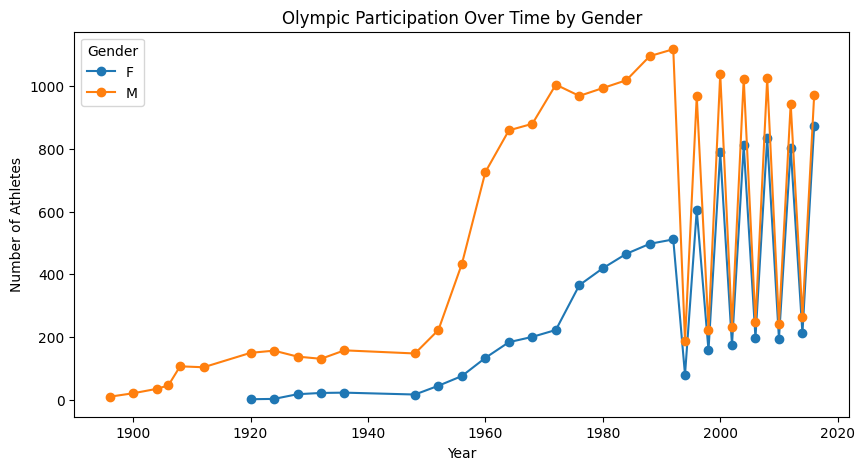

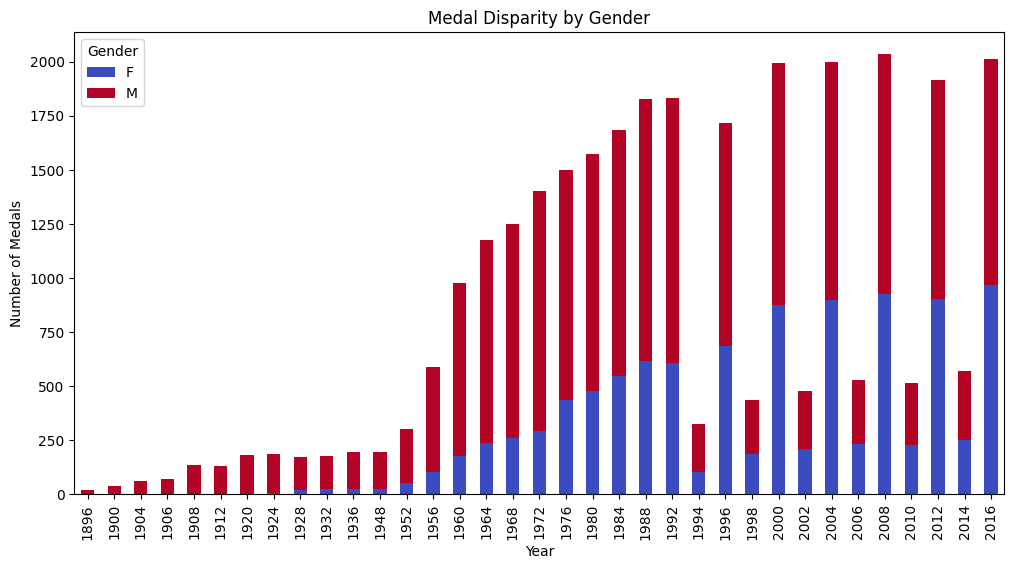

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df['Sex'].unique())  


plt.figure(figsize=(10, 5))
participation = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack()
participation.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Olympic Participation Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.savefig("Olympic Participation Over Time by Gender.png")
plt.show()


medals = df[df['Medal'].notna()].groupby(['Year', 'Sex'])['Medal'].count().unstack()
medals.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Medal Disparity by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.savefig("Medal Disparity by Gender.png")
plt.show()

Sex                  F     M
Sport                       
Alpine Skiing      5.0   5.0
Archery            2.0   2.0
Art Competitions   0.0   2.0
Athletics         27.0  55.0
Badminton          3.0   3.0


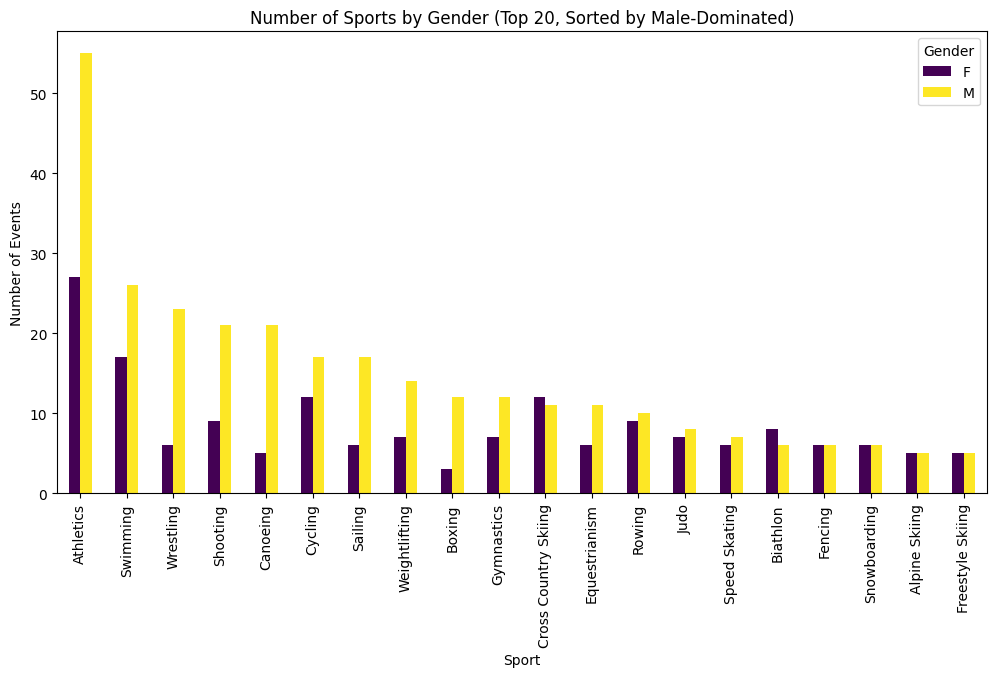

In [7]:
import matplotlib.pyplot as plt

sports = df.groupby(['Sport', 'Sex'])['Event'].nunique().unstack()

sports = sports.rename(columns={'Male': 'M', 'Female': 'F'})
sports = sports.fillna(0)

print(sports.head())

top_sports = sports.sum(axis=1).nlargest(20).index  
sports = sports.loc[top_sports].sort_values(by='M', ascending=False)  # Sort by male events descending

sports.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Number of Sports by Gender (Top 20, Sorted by Male-Dominated)')
plt.xlabel('Sport')
plt.ylabel('Number of Events')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.savefig("Sports Representation by Gender - Fixed.png")
plt.show()


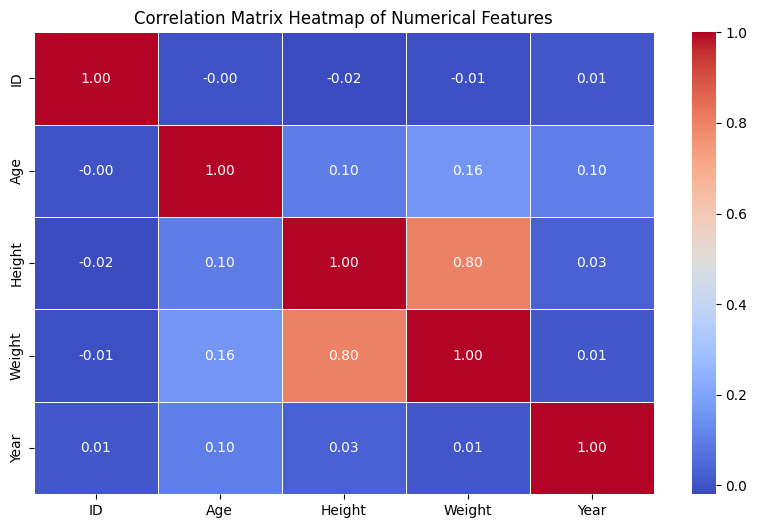

In [8]:
numerical_df = df.select_dtypes(include=['number'])


correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap of Numerical Features")
plt.savefig("Correlation Matrix Heatmap of Numerical Features.png")
plt.show()

In [ ]:
!pip install statsmodels

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np  


file_path = "athlete_events.csv"  
df = pd.read_csv(file_path)


numerical_columns = df.select_dtypes(include=[np.number]).columns
print(df[numerical_columns].describe())

x_col = "Height"  
y_col = "Weight"  

df_reg = df[[x_col, y_col]].dropna()


X = sm.add_constant(df_reg[x_col])  
model = sm.OLS(df_reg[y_col], X).fit()


print(model.summary())

plt.figure(figsize=(8, 6))
sns.regplot(x=df_reg[x_col], y=df_reg[y_col], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Linear Regression: {y_col} vs {x_col}")
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
!pip install statsmodels

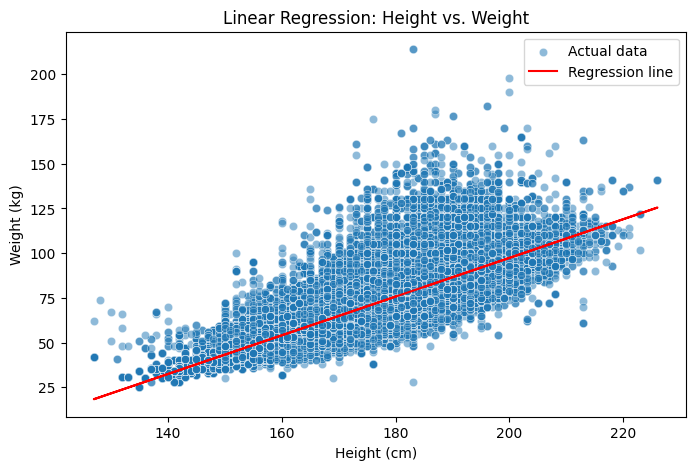

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

file_path = "athlete_events.csv"
df = pd.read_csv(file_path)

df = df[['Height', 'Weight']].dropna() 

X = df[['Height']]
y = df['Weight']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Height'], y=y, alpha=0.5, label="Actual data")
plt.plot(X, y_pred, color='red', label="Regression line")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression: Height vs. Weight")
plt.legend()
plt.savefig("regression.png")
plt.show()


In [1]:
import pandas as pd

df = pd.read_csv("athlete_events.csv")

athlete_counts = df.groupby(["Name", "Sex"]).size().reset_index(name="Count")

top_males = athlete_counts[athlete_counts["Sex"] == "M"].nlargest(2, "Count")
top_females = athlete_counts[athlete_counts["Sex"] == "F"].nlargest(2, "Count")

print("Top Male Athletes:\n", top_males)
print("Top Female Athletes:\n", top_females)


Top Male Athletes:
                             Name Sex  Count
107161      Robert Tait McKenzie   M     58
47120   Heikki Ilmari Savolainen   M     39
Top Female Athletes:
                                    Name Sex  Count
94960  Oksana Aleksandrovna Chusovitina   F     29
38981                 Gabriella Paruzzi   F     25
